In [74]:
import os
import random
import matplotlib.pyplot as plt
import cv2
from glob import glob
import yaml


In [75]:
%matplotlib inline

In [76]:
# Set the base directory for the dataset
base_dir = '/home/ian/intellicook/ingredient-recognition/model/data/Food Ingredient Recognition.v4i.yolov11'


In [77]:
# Load the class names from the dataset YAML file
yaml_file_path = os.path.join(base_dir, 'data.yaml')
if os.path.exists(yaml_file_path):
    with open(yaml_file_path, 'r') as file:
        data_yaml = yaml.safe_load(file)
    class_names = [name.replace(' ', '_') for name in data_yaml['names']]
else:
    print(f"File not found: {yaml_file_path}")
    class_names = []

In [84]:
# Function to get random image paths for each class
def get_random_images_per_class(base_dir, class_names):
    images_per_class = {}
    for class_name in class_names:
        image_paths = glob(os.path.join(base_dir, 'train', 'images', f'{class_name}*.jpg'))
        if image_paths:
            images_per_class[class_name] = random.choice(image_paths)
        else:
            print(f"No images found for class: {class_name}")
    return images_per_class


No images found for class: '
No images found for class: -
No images found for class: coconuts
No images found for class: milk
No images found for class: peper
No images found for class: pepper


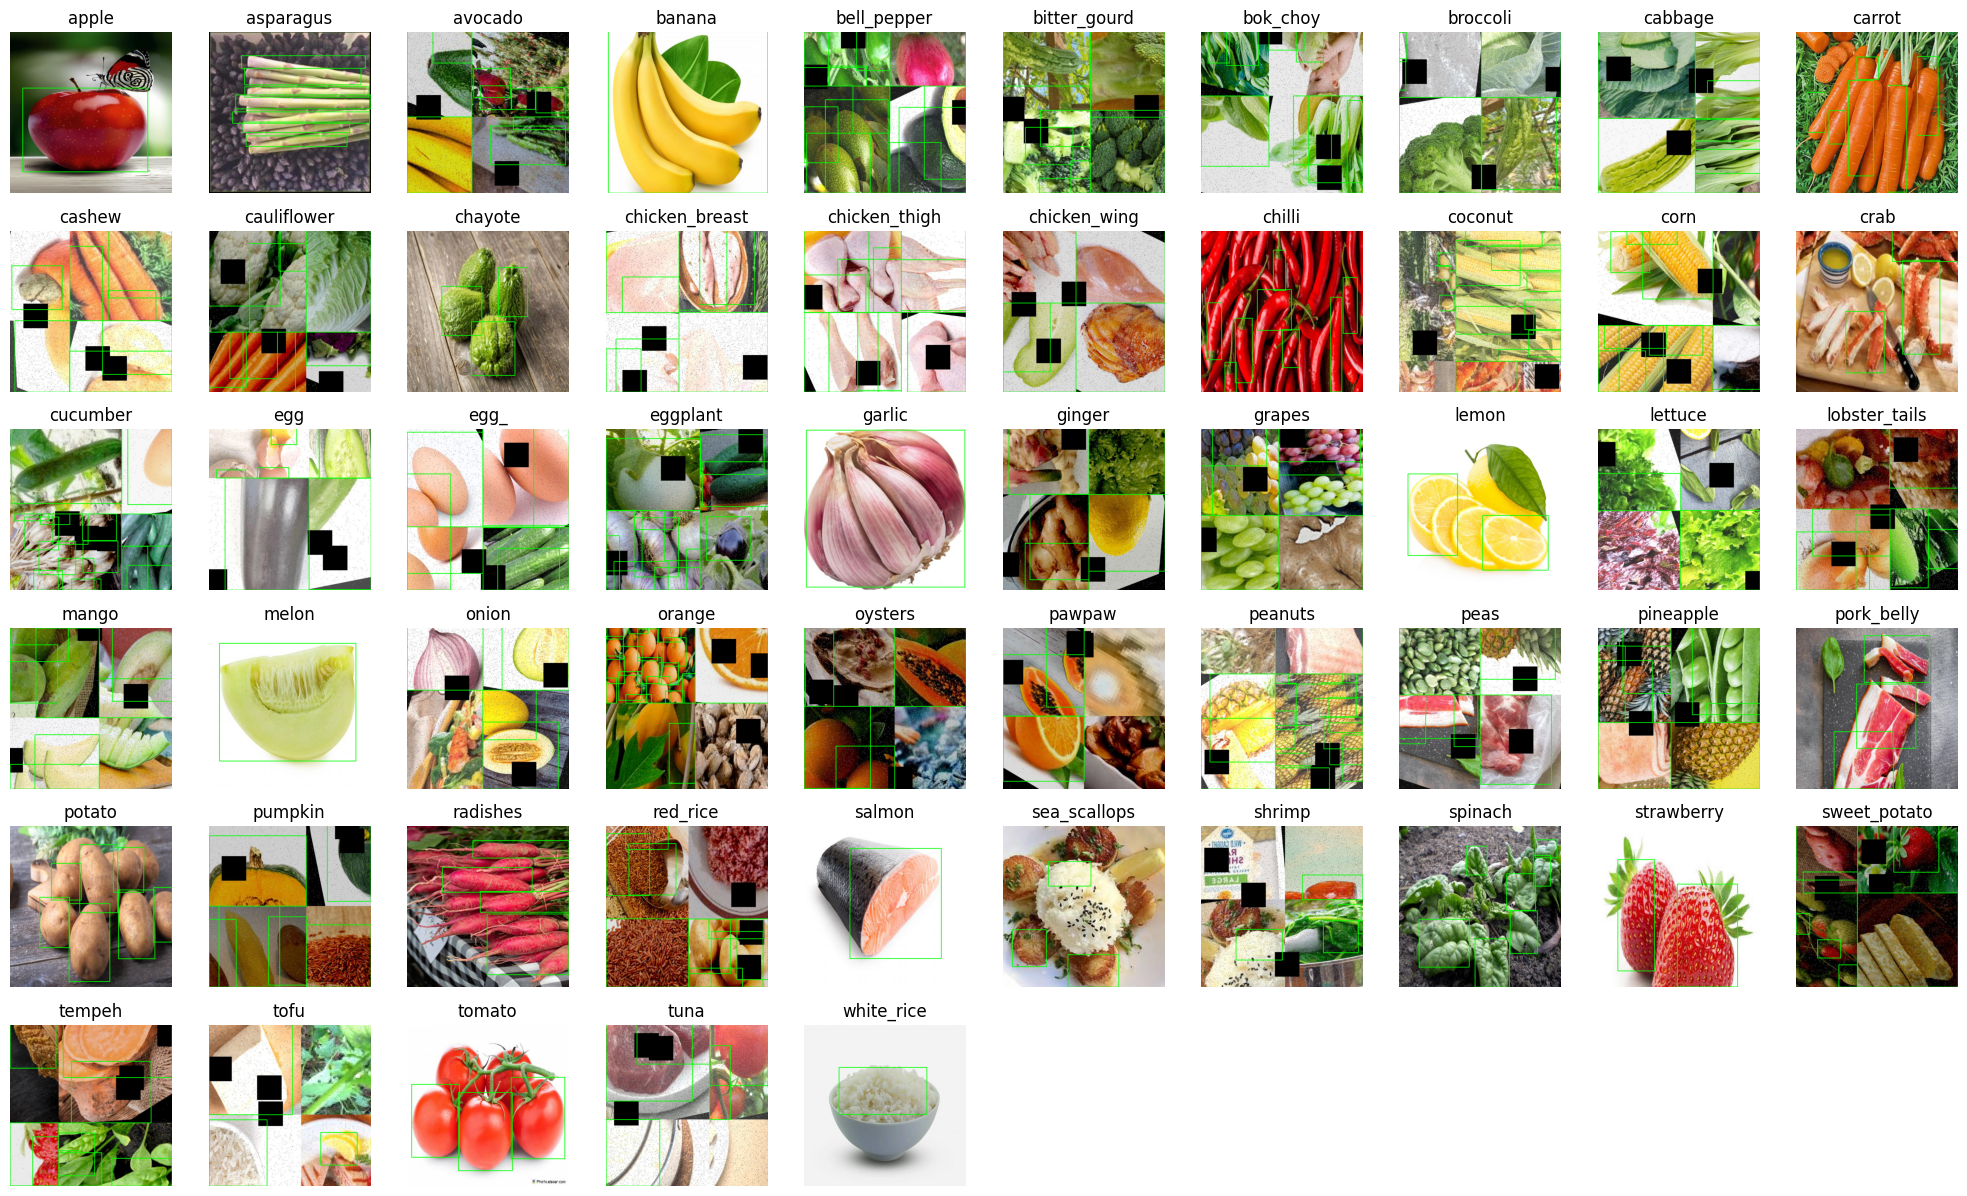

In [85]:
# Visualize the images with bounding boxes
plt.figure(figsize=(20, 20))
images_per_class = get_random_images_per_class(base_dir, class_names)
for i, (class_name, image_path) in enumerate(images_per_class.items()):
    image = cv2.imread(image_path)
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # Draw bounding box
        label_path = image_path.replace('images', 'labels').replace('.jpg', '.txt')
        if os.path.exists(label_path):
            with open(label_path, 'r') as file:
                for line in file.readlines():
                    class_id, x_center, y_center, width, height = map(float, line.strip().split())
                    x1 = int((x_center - width / 2) * image.shape[1])
                    y1 = int((y_center - height / 2) * image.shape[0])
                    x2 = int((x_center + width / 2) * image.shape[1])
                    y2 = int((y_center + height / 2) * image.shape[0])
                    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        plt.subplot(10, 10, i + 1)
        plt.imshow(image)
        plt.title(class_name)
        plt.axis('off')
    else:
        print(f"Failed to load image: {image_path}")
plt.tight_layout()
plt.show()